In [1]:
from assess_property.fit_learner import MakeExperiment

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import describe
import shap 

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


# Make experiment

In [3]:
_, experiment, _ = MakeExperiment()

100%|██████████| 10/10 [00:15<00:00,  1.50s/it]


# Fit LGBM using the whole dataset

In [4]:
pipe = experiment.fit(learner = "lgbm")

In [5]:
pipe

Pipeline(steps=[('scaler', StandardScaler()), ('imputer', SimpleImputer()),
                ('lgbm', LGBMRegressor(subsample_for_bin=611398))])

## Extract LGBM from pipe

In [7]:
model = pipe[2]
print(model)

LGBMRegressor(subsample_for_bin=611398)


## Extract transformed data from pipe

In [16]:
X = pipe[:-1].transform(experiment.X)
Xdf = pd.DataFrame(data = X,
                   columns = experiment.var_names)
Xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305699 entries, 0 to 305698
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   YR_BUILT     305699 non-null  float64
 1   YEAR         305699 non-null  float64
 2   YR_REMODEL   305699 non-null  float64
 3   LIVING_AREA  305699 non-null  float64
dtypes: float64(4)
memory usage: 9.3 MB


# Compute SHAP feature importance

In [19]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xdf)

# Visualize importance

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


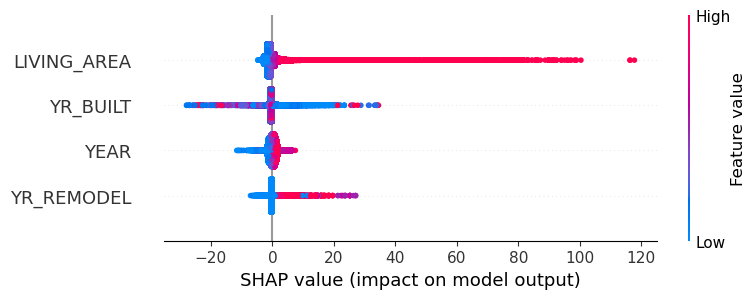

In [20]:
shap.summary_plot(shap_values, Xdf)